# EDA and Regression of student performance

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
from scipy import stats

sns.set()

df = pd.read_csv("https://docs.google.com/spreadsheets/d/1xWJvi3Xg0URdoFDRA4hDkCfcXVLHLJgvm2rAli0-pe4/export?format=csv&id=1xWJvi3Xg0URdoFDRA4hDkCfcXVLHLJgvm2rAli0-pe4&gid=1091522786")

## Exploring data structure and Preprocessing.

In [20]:
print(df.nunique())
print(df.isnull().sum())

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [53]:
categorical_variables = ['race/ethnicity']

for cols in categorical_variables:
    df[cols]= df[cols].astype('category')
    
df = pd.get_dummies(df, columns = categorical_variables,drop_first=True)

def education_preprocess(x):
    if x == 'some high school':
        return 0
    if x == 'high school':
        return 1
    if x == 'some college':
        return 2
    if x == 'associate\'s degree':
        return 3
    if x == 'bachelor\'s degree':
        return 4
    if x == 'master\'s degree':
        return 5


df['gender'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)
df['lunch'] = df['lunch'].apply(lambda x: 1 if x == 'standard' else 0)
df['test preparation course'] = df['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)
df['parental level of education'] = df['parental level of education'].apply(education_preprocess)

## Exploring Gender's effect on student performance

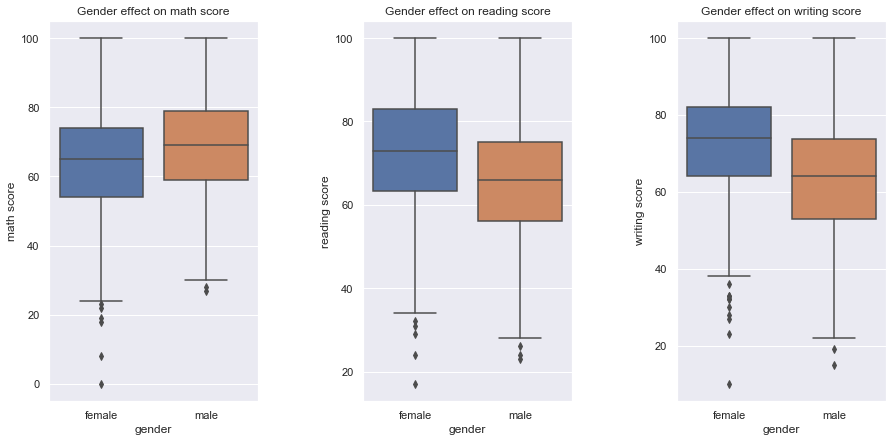

In [2]:
columns = ['math score','reading score','writing score']

plt.figure(figsize=(15, 7))

for i,col in enumerate(columns):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(x='gender',y=col,data=df)
  plt.title(f"Gender effect on {col}")
  plt.subplots_adjust(wspace = 0.5)

The plots show that male performes better than female in Maths. However females perform better in Reading and Writing.

Lets determine if these differences happen by chance or are statistically significant.

$$H0 = There \,is \,no \,significant \,difference \,between \,the \,scores \,of \,the \,samples \,of \,male \,and \,female \,students.$$
$$H1 = There \,is \,a \,significant \,difference \,between \,the \,scores \,of \,the \,samples \,of \,male \,and \,female \,students.$$

In [11]:
def significance_test(group_1,group_2,equal_variance,alpha):
  '''
  A function that performs an independent t test and determines if the means
  of the groups are significantly different
  '''
  
  mean_group_1 = np.mean(group_1)
  mean_group_2 = np.mean(group_2)
  stat,p_value = stats.ttest_ind(group_1,group_2,equal_var=equal_variance)
  
  if p_value < alpha:
    print(f"There is a statistically significant difference between the two groups {max(mean_group_1,mean_group_2)} is greater")
  else:
    print("The two groups are not statistically significantly different")
    
  

In [13]:
male_math_score = df[df['gender'] == 1]['math score']
female_math_score = df[df['gender'] == 0]['math score']
male_reading_score = df[df['gender'] == 1]['reading score']
female_reading_score = df[df['gender'] == 0]['reading score']
male_writing_score = df[df['gender'] == 1]['writing score']
female_writing_score = df[df['gender'] == 0]['writing score']

significance_test(male_math_score,female_math_score,True,0.05)
significance_test(male_reading_score,female_reading_score,True,0.05)
significance_test(male_writing_score,female_writing_score,True,0.05)

There is a statistically significant difference between the two groups 68.72821576763485 is greater
There is a statistically significant difference between the two groups 72.60810810810811 is greater
There is a statistically significant difference between the two groups 72.46718146718146 is greater


The statistical test confirms what the box plot shows, there is a significant difference between the two genders for each of the scores.

## Regression on Math Score

In [55]:
cols = [col for col in df.columns if col not in ['writing score', 'reading score','math score']]
X = df[cols]
y = df['math score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     41.58
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.72e-57
Time:                        20:27:32   Log-Likelihood:                -3992.6
No. Observations:                1000   AIC:                             8003.
Df Residuals:                     991   BIC:                             8047.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          47.2572      1.690     27.958      0.000      43.940      50.574
gender                          4.9492      0.838      5.903      0.000       3.304       6.594
parental level of education     1.6662      0.287      5.796      0.000       1.102       2.230
lunch                          10.8994      0.873     12.488      0.000       9.187      12.612
test preparation course         5.6195      0.872      6.448      0.000       3.909       7.330
race/ethnicity_group B          1.8897      1.697      1.114      0.266      -1.440       5.220
race/ethnicity_group C          2.3755      1.589      1.495      0.135      -0.743       5.494
race/ethnicity_group D          5.3573      1.621      3.304      0.001       2.176       8.539
race/ethnicity_group E         10.1181      1.798      5.629      0.000       6.591      13.645
==============================================================================
Omnibus:                        8.601   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.767
Skew:                          -0.225   Prob(JB):                       0.0125
Kurtosis:                       2.911   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## QQ-Plot of residuals

The qq plot suggests that residuals are fairly normally distributed and assumption is met.

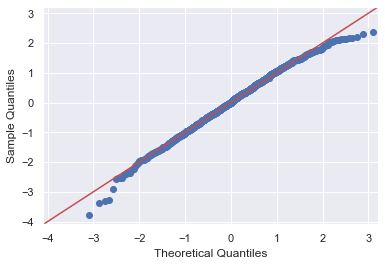

In [57]:
residuals = model.resid
sm.qqplot(residuals,fit=True,line='45')
plt.show()

## Findings

Observing the plots and the statistical test we can see that gender has a significant differene on the test scores.

I ran into the dummy variable trap whilst building a regression model to infer the individual effects of the independent variables on the dependent variable. To solve this problem i decided to remove the first generated dummy variable. 

The regression model gives us further insight into the effects of the independent variables.

The variable that seems to have the strongest effect is lunch. Students who have standard lunch on average have 10.9±0.9 higher marks on the maths test than students who have a free/reduced lunch. This could be because of family wealth. Students that can afford standard lunches tned to be from more wealthier families and might have the chance to enrol on tution courses.

The next insight from the regression might be controversial. According to this model the race of the student has an impact on their math scores. I had to remove the race/ethnicity_group A to avoid the dummy variable trap and multicolinearity within the model. So the coeffiencets tell us that on average race/ethnicty_group E scores 10.2±1.8 higher on their math scores than race/ethnicity_group A (as this is our reference point due to removal). 